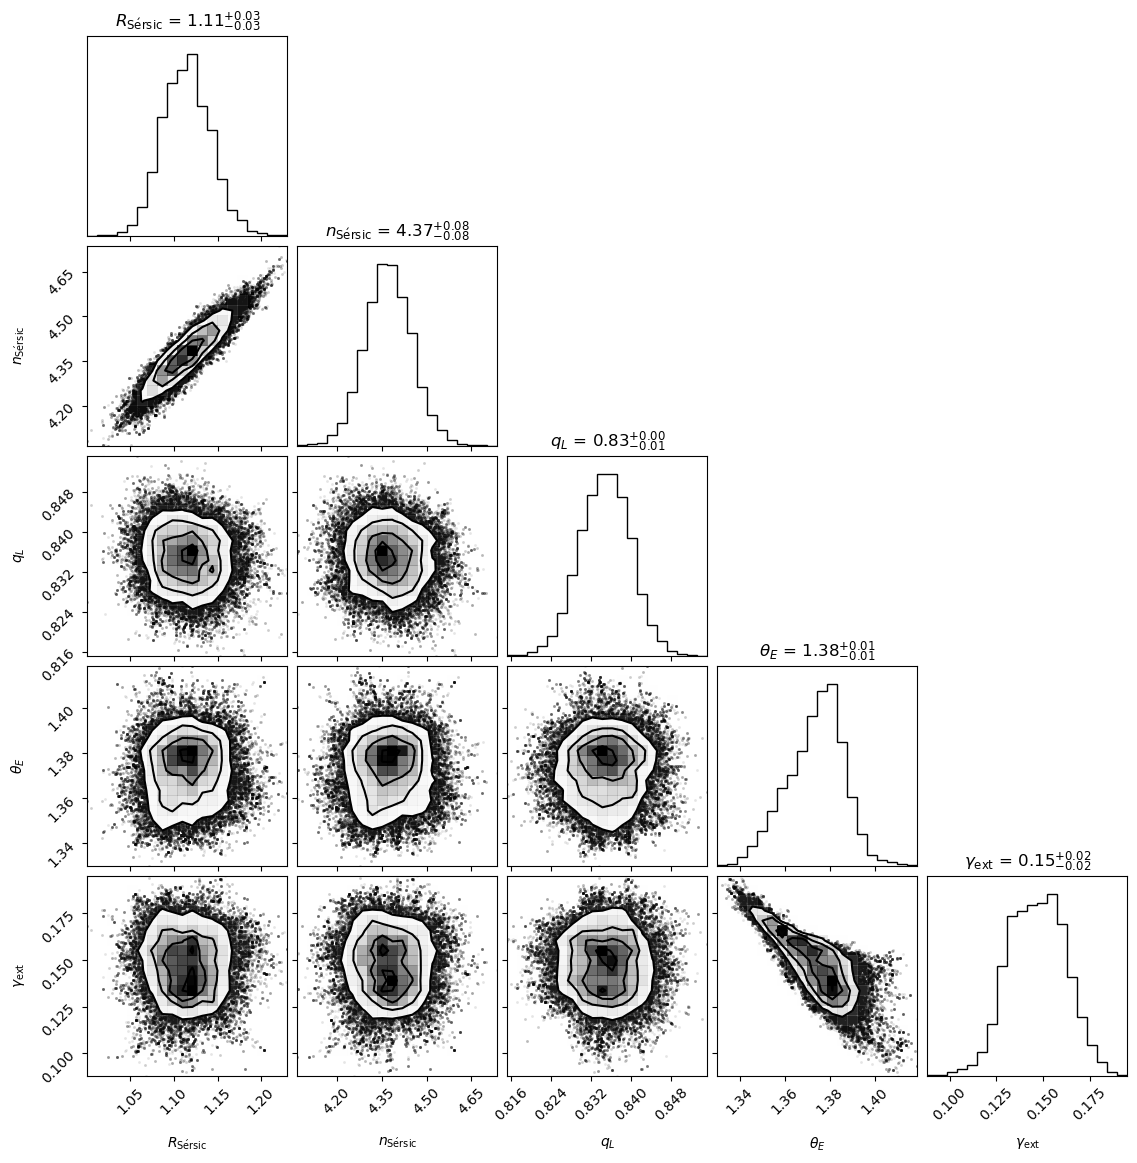

In [ ]:
import pickle
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
from lenstronomy.Workflow.fitting_sequence import FittingSequence
import h5py
import corner
import numpy as np
import matplotlib.pyplot as plt

name = "J2325-5229"
filter = "F814W"
filename = f"../../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

# Load the saved data
with open(filename, "rb") as f:
    loaded_data = pickle.load(f)

kwargs_result = loaded_data["kwargs_result"]
multi_band_list = loaded_data["multi_band_list"]
kwargs_model = loaded_data["kwargs_model"]
kwargs_params = loaded_data.get("kwargs_params", None)
chain_list = loaded_data.get('chain_list')
kwargs_constraints = loaded_data.get("kwargs_constraints", None)
kwargs_likelihood = loaded_data.get("kwargs_likelihood", None)
kwargs_data_joint = loaded_data.get("kwargs_data_joint", None)

fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params)

# Get MCMC samples
sampler_type, samples_mcmc, param_mcmc, dist_mcmc = chain_list[1]

# Indices of desired parameters
param_names = ['R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'theta_E_lens0',
                'gamma1_lens1', 'gamma2_lens1']
indices = [param_mcmc.index(p) for p in param_names]

# Extract chains
r_sersic = samples_mcmc[:, indices[0]]
n_sersic = samples_mcmc[:, indices[1]]
e1 = samples_mcmc[:, indices[2]]
e2 = samples_mcmc[:, indices[3]]
theta_E = samples_mcmc[:, indices[4]]
gamma1_chain = samples_mcmc[:, indices[5]]
gamma2_chain = samples_mcmc[:, indices[6]]

# Compute ellipticity and convert to axis ratio q
e = np.sqrt(e1**2 + e2**2)
q = (1 - e) / (1 + e)

gamma_chain = np.sqrt(gamma1_chain**2 + gamma2_chain**2)

samples_corner = np.vstack([r_sersic, n_sersic, q, theta_E, gamma_chain]).T
labels_corner = [r'$R_{\mathrm{S\'ersic}}$', r'$n_{\mathrm{S\'ersic}}$', r'$q_L$', r'$\theta_E$', r'$\gamma_{\text{ext}}$']

# Plot
fig = corner.corner(samples_corner, labels=labels_corner, show_titles=True)
plt.show()


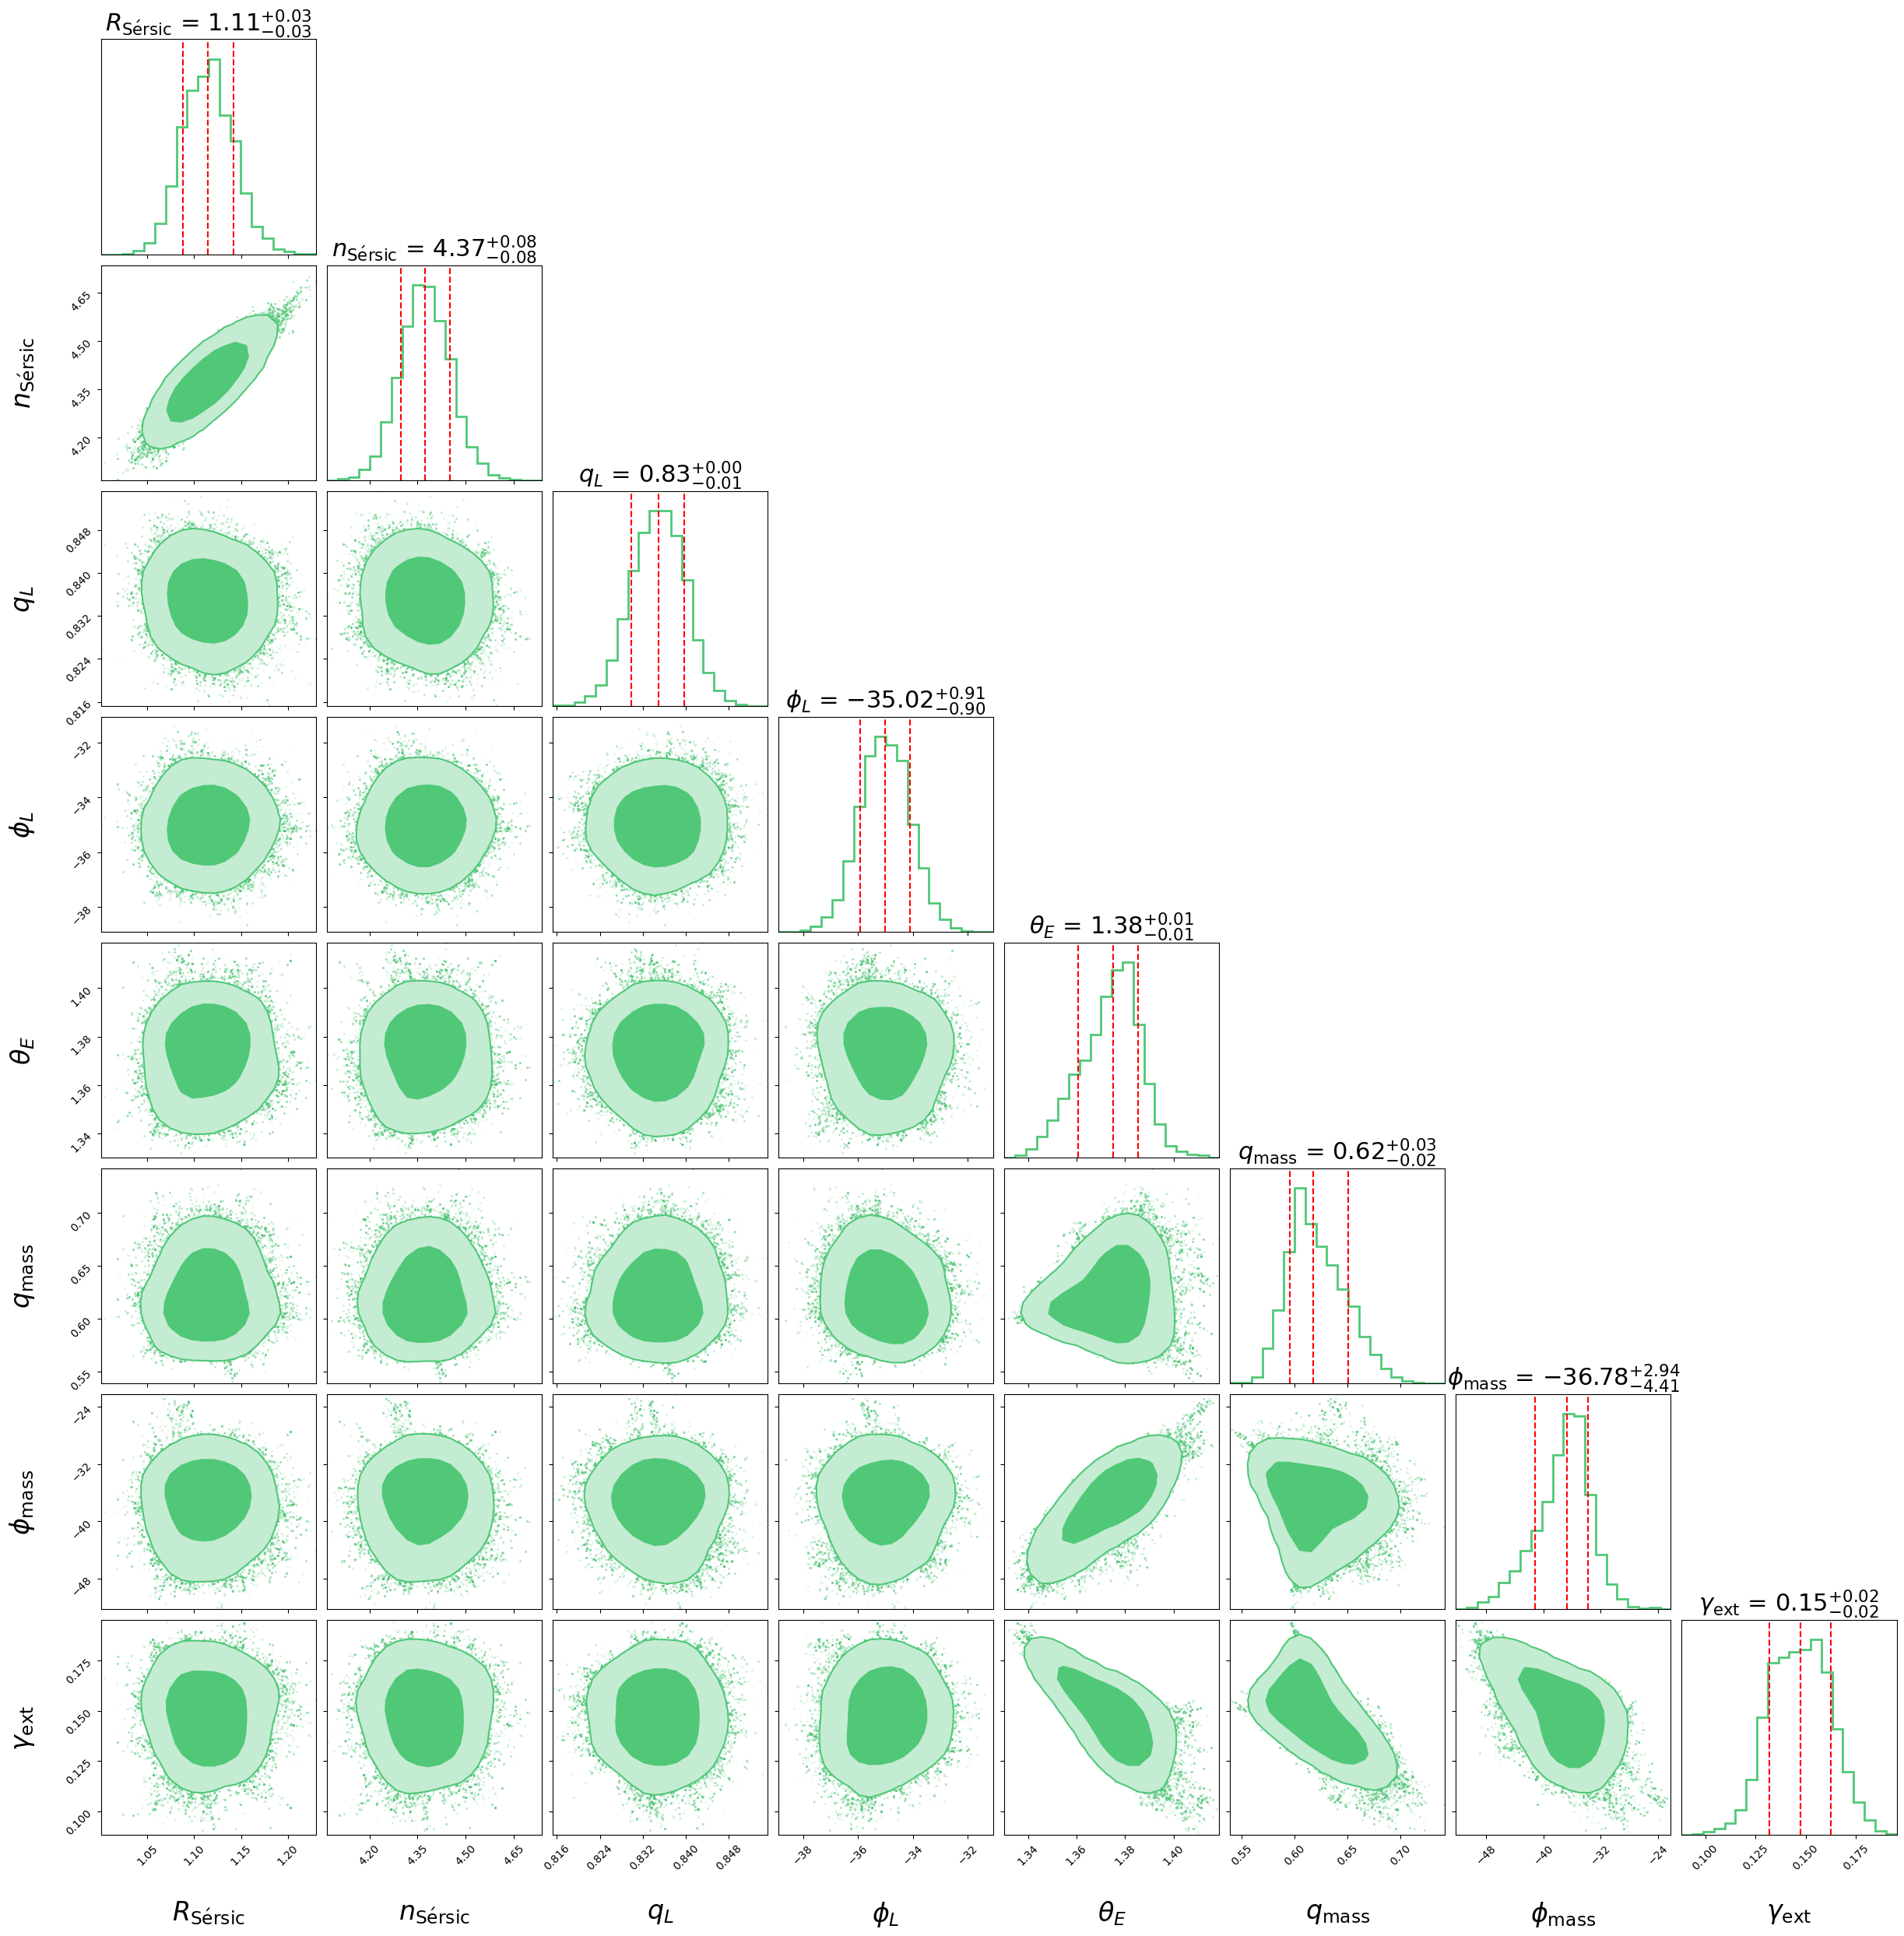

In [ ]:
import pickle
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
from lenstronomy.Workflow.fitting_sequence import FittingSequence
import h5py
import corner
import numpy as np
import matplotlib.pyplot as plt

# --- Load Data ---
name = "J2325-5229"
filter = "F814W"
filename = f"../../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

with open(filename, "rb") as f:
    loaded_data = pickle.load(f)

kwargs_result = loaded_data["kwargs_result"]
kwargs_model = loaded_data["kwargs_model"]
kwargs_params = loaded_data.get("kwargs_params", None)
chain_list = loaded_data.get('chain_list')
kwargs_constraints = loaded_data.get("kwargs_constraints", None)
kwargs_likelihood = loaded_data.get("kwargs_likelihood", None)
kwargs_data_joint = loaded_data.get("kwargs_data_joint", None)

fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params)

# --- MCMC Samples ---
sampler_type, samples_mcmc, param_mcmc, dist_mcmc = chain_list[1]

param_names = [
    'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0',
    'theta_E_lens0', 'gamma1_lens1', 'gamma2_lens1', 'e1_lens0', 'e2_lens0'
]
indices = [param_mcmc.index(p) for p in param_names]

r_sersic = samples_mcmc[:, indices[0]]
n_sersic = samples_mcmc[:, indices[1]]
e1 = samples_mcmc[:, indices[2]]
e2 = samples_mcmc[:, indices[3]]
theta_E = samples_mcmc[:, indices[4]]
gamma1_chain = samples_mcmc[:, indices[5]]
gamma2_chain = samples_mcmc[:, indices[6]]
e1_mass = samples_mcmc[:, indices[7]]
e2_mass = samples_mcmc[:, indices[8]]

e = np.sqrt(e1**2 + e2**2)
e_mass = np.sqrt(e1_mass**2 + e2_mass**2)
q = (1 - e) / (1 + e)
gamma_chain = np.sqrt(gamma1_chain**2 + gamma2_chain**2)
phi = 0.5 * np.arctan2(e2, e1) * 180 / np.pi
q_mass = (1-e_mass) / (1+e_mass)
phi_mass = 0.5 * np.arctan2(e2_mass, e1_mass) * 180/np.pi

samples_corner = np.vstack([r_sersic, n_sersic, q, phi, theta_E, q_mass, phi_mass, gamma_chain]).T
labels_corner = [r'$R_{\mathrm{S\'ersic}}$', r'$n_{\mathrm{S\'ersic}}$', r'$q_L$', r'$\phi_L$', r'$\theta_E$', r'$q_{\mathrm{mass}}$', r'$\phi_{\mathrm{mass}}$', r'$\gamma_{\text{ext}}$']

custom_color = "#50C878" 
fig = corner.corner(
    samples_corner,
    labels=labels_corner,
    show_titles=True,
    title_fmt=".2f",
    quantiles=[0.16, 0.5, 0.84],
    title_kwargs={"fontsize": 22},
    label_kwargs={"fontsize": 24},
    color=custom_color,
    smooth=1.0,
    plot_density=True,
    fill_contours=True,
    levels=(0.68, 0.95),
    plot_datapoints=True,
    hist_kwargs={"color": custom_color, "linewidth": 2},
    contour_kwargs={"colors": [custom_color]},
)

# Change dashed quantile line color
for ax in fig.get_axes():
    # loop over lines in each axis
    for line in ax.get_lines():
        if line.get_linestyle() == '--':
            line.set_color("red")  


fig.set_size_inches(25, 25)